In [79]:
import pandas as pd
import numpy as np 

In [80]:
df = pd.read_csv('kavs.csv', encoding='ISO-8859-1')


In [81]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s...",just as a shop has to give a guarantee on wha...,NaN,NaN
741,ham,Do well :)all will for little time. Thing of g...,NaN,NaN,NaN
3541,ham,ÌÏ come lt 25 n pass to me lar,NaN,NaN,NaN
2161,ham,Is she replying. Has boye changed his phone nu...,NaN,NaN,NaN
1568,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

In [83]:
#1.data cleaning 
#2.eda(data analysis)
#3 text preprocessing
#4 model building 
#5. eualution
#6. imporovement 
#7. website 
#8. deploy 

#data cleaning

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [85]:
#drop cloumns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')


In [86]:
df.sample(5)

,v1,v2
2173,ham,"Hiya, had a good day? Have you spoken to since..."
4519,ham,What to think no one saying clearly. Ok leave ...
422,ham,Siva is in hostel aha:-.
169,ham,Yes :)it completely in out of form:)clark also...
860,ham,In work now. Going have in few min.


In [87]:
#renaming the cols 
df.rename(columns = {'v1' : 'target','v2' : 'text'},inplace = True)

In [88]:
df.sample(5)

,target,text
4335,ham,"Fyi I'm taking a quick shower, be at epsilon i..."
2537,ham,That's y we haf to combine n c how lor...
4364,ham,Ujhhhhhhh computer shipped out with address to...
2702,ham,"Omw back to tampa from west palm, you hear wha..."
3782,ham,Can you do online transaction?


In [89]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()


In [90]:
df['target'] = encoder.fit_transform(df['target'])

In [91]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
#missing values 

df.isnull().sum()

target    0
text      0
dtype: int64

In [93]:
#check for duplicate values 

df.duplicated().sum()

np.int64(403)

In [94]:
#remove duplicates 
# Correct example:
df = df.drop_duplicates(keep='first')
print(df.head())


   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df.shape

(5169, 2)

#EDA(DATA ANALYSIS)

In [97]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x203dd03f170>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87'),
  Text(0.553363565906573, -0.231924047755212, '13')])

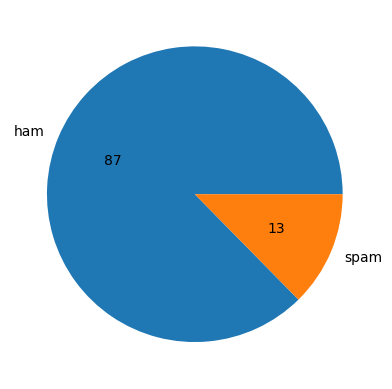

In [99]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%2.0f")

#data is imblanced 

In [100]:
!pip install nltk

In [101]:
import nltk

In [102]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Kavya
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
df['num_char'] = df['text'].apply(len)

In [104]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [105]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer resource
nltk.download('punkt_tab')

# Now you can tokenize the text
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt_tab to C:\Users\Kavya
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [106]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
#num of sentance 
from nltk.tokenize import sent_tokenize

df['num_sentance'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


In [108]:
df.head()

,target,text,num_char,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
df[['num_char','num_words','num_sentance']].describe()

,num_char,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
#ham
df[df['target']==0][['num_char','num_words','num_sentance']].describe()

,num_char,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
#spam 
df[df['target']==1][['num_char','num_words','num_sentance']].describe()

,num_char,num_words,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [112]:
import seaborn as sns 

<Axes: xlabel='num_char', ylabel='Count'>

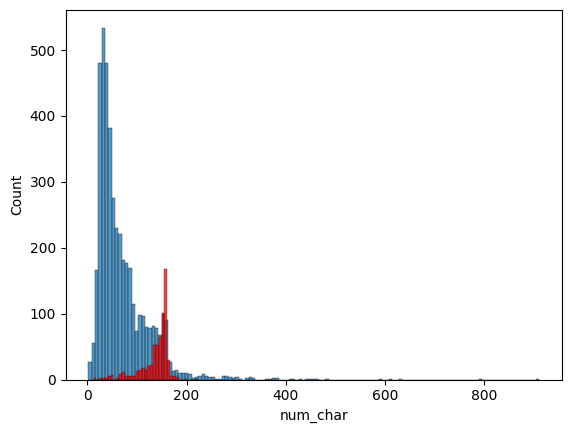

In [113]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

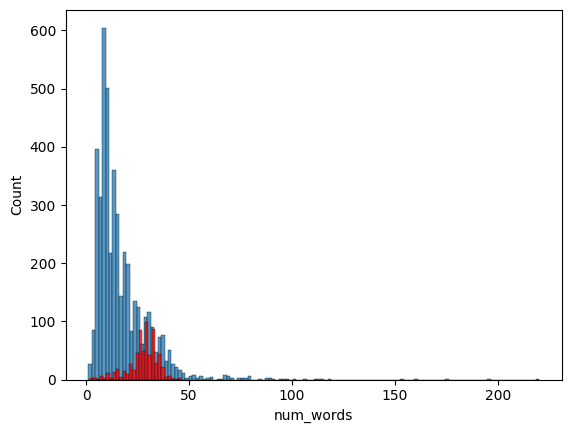

In [114]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color ='red')

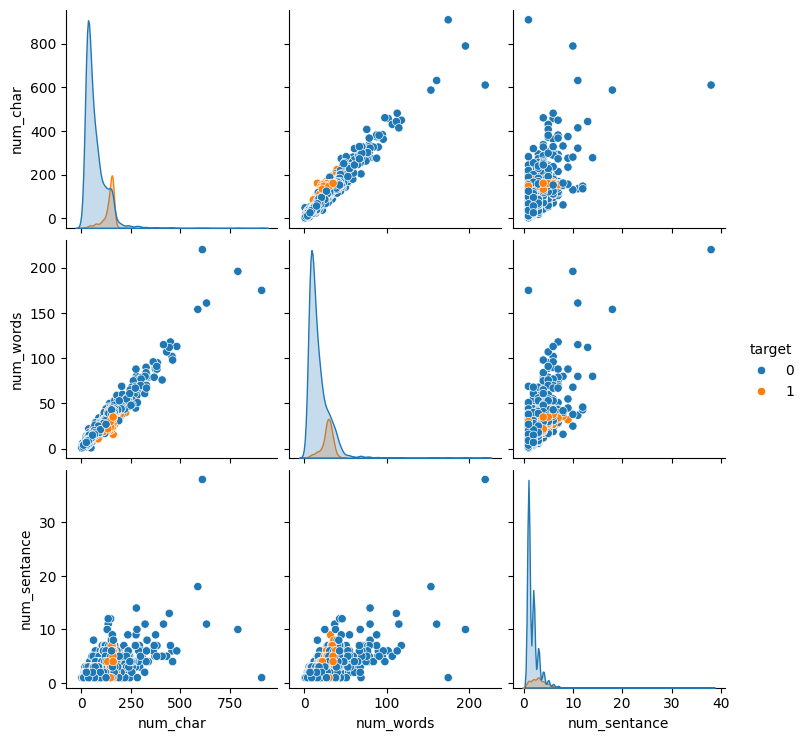

In [115]:
#num of sentance relation with num of words
sns.pairplot(df,hue='target')

<Axes: >

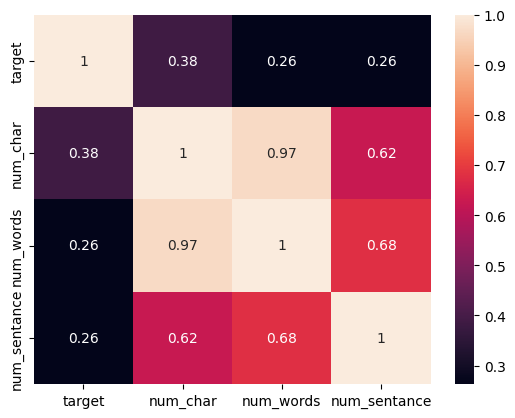

In [116]:
sns.heatmap(df.corr(numeric_only=True),annot=True )


#text preprocesing 
    #lower case
    #tokenization
    #removing special characters
    #removing stop words and punctuation 
    #stemming / laminatization

In [117]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Kavya
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download the stopwords dataset
nltk.download('stopwords')

# Initialize PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize text
    
    # Remove non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    
    # Apply stemming
    y = [ps.stem(i) for i in y]
    
    # Return the transformed text as a list
    return y




[nltk_data] Downloading package stopwords to C:\Users\Kavya
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
#example usage 
text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
transformed_text = transform_text(text)
print(transformed_text)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


In [120]:
df['transformed_text'] = df['text'].apply(transform_text)

In [121]:
df.head()

,target,text,num_char,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [122]:
#word cloud of spam message 

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color ="white")

In [123]:
# Ensure that all values are strings before concatenating
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=""))


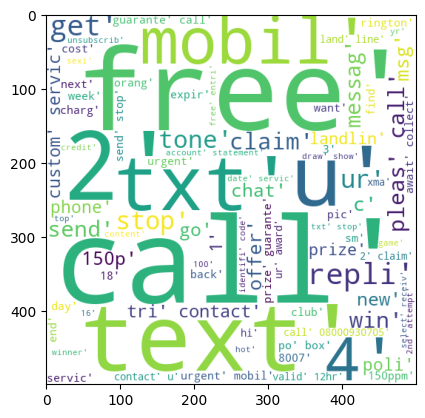

In [124]:
plt.imshow(spam_wc)

In [125]:
#word cloud of ham messages 
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=""))


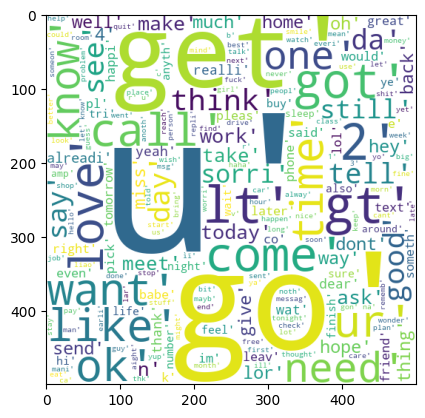

In [126]:
plt.imshow(spam_wc)

In [127]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:  # Iterate directly through the list of words
        spam_corpus.append(word)


In [128]:
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

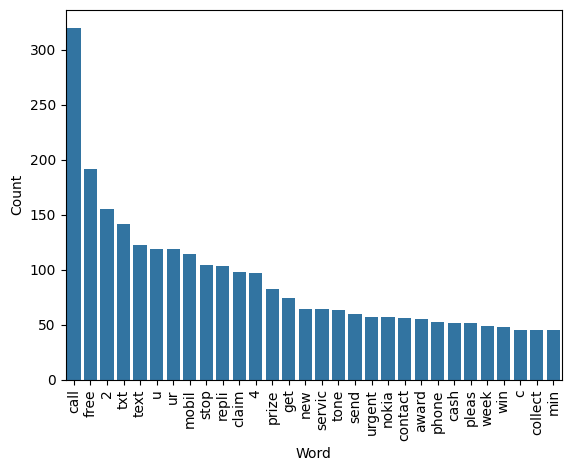

In [129]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming spam_corpus is a list of words
spam_counter = Counter(spam_corpus)

# Create a DataFrame from the most common words
spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(x=spam_df['Word'], y=spam_df['Count'])
plt.xticks(rotation='vertical')
plt.show


In [130]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:  # Iterate directly through the list of words
        ham_corpus.append(word)

In [131]:
len(ham_corpus)

35404

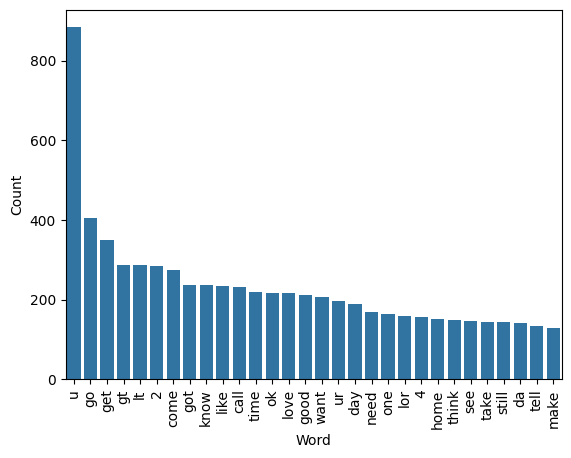

In [132]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming ham_corpus is a list of words
ham_counter = Counter(ham_corpus)

# Create a DataFrame from the most common words
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Count'])

# Plot the barplot for ham_df
sns.barplot(x=ham_df['Word'], y=ham_df['Count'])
plt.xticks(rotation='vertical')
plt.show()


##model building

In [133]:
##baised on knive based alogoritham

In [134]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

# Tokenizing the text (this is an example for switching to deep learning)
cv = CountVectorizer(stop_words='english')  
X_cv = cv.fit_transform(X)

# Pad sequences to ensure the same input length
X_pad = pad_sequences(X_cv.toarray(), padding='post', maxlen=100)  # Adjust maxlen as needed

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Adjust input_dim based on vocab size
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Save the trained model


Epoch 1/5


C:\Users\Kavya Joshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8486 - loss: 0.4325 - val_accuracy: 0.8598 - val_loss: 0.4055
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8804 - loss: 0.3674 - val_accuracy: 0.8598 - val_loss: 0.4104
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8823 - loss: 0.3681 - val_accuracy: 0.8598 - val_loss: 0.4058
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8845 - loss: 0.3603 - val_accuracy: 0.8598 - val_loss: 0.4077
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8790 - loss: 0.3699 - val_accuracy: 0.8598 - val_loss: 0.4056


In [137]:
import pandas as pd

# Try loading the CSV with a different encoding
df = pd.read_csv('kavs.csv', encoding='latin1')  # You can also try 'ISO-8859-1' or 'utf-16'

# Check the structure of your dataset
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
from tensorflow.keras.models import save_model

# Step 1: Load the dataset
df = pd.read_csv('kavs.csv', encoding='latin1')  # Use the correct encoding

# Step 2: Preprocess the data
# Assuming your dataset has a 'text' column for SMS and a 'label' column for spam/ham
X = df['text']  # Text data
y = df['target']  # Labels (Spam or Ham)

# Step 3: Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 5: Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Step 8: Save the model and vectorizer
model.save('sms_scam_model.h5')  # Save the model
joblib.dump(vectorizer, 'vectorizer.pkl')  # Save the vectorizer

print("Model and vectorizer saved successfully.")


KeyError: 'text'

In [141]:
df = pd.read_csv('kavs.csv', encoding='latin1')
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [145]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('kavs.csv', encoding='latin1')

# Step 2: Check the columns to ensure correct column names
print(df.columns)
print(df.head())

# Step 3: Preprocess the data
# Use the actual column names after inspecting your dataset
X = df['v1']  # Replace with actual column name for text data
y = df['v2']  # Replace with actual column name for label data

# Optionally preprocess the text data (convert to lowercase, remove special characters)
X = X.str.lower().str.replace(r'\W', ' ')  # Remove non-alphabetic characters

# Step 4: Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 5: Label Encoding (if necessary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 6: Compute class weights (if necessary)
classes = np.array([0, 1])  # Convert list to numpy array
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_encoded)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Step 8: Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model with class weights (if applicable)
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Print classification report
print(classification_report(y_test, y_pred))

# Step 11: Save the model and vectorizer
model.save('sms_scam_model.keras')  # Save the model in the recommended format
joblib.dump(vectorizer, 'vectorizer.pkl')  # Save the vectorizer

print("Model and vectorizer saved successfully.")


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


ValueError: classes should include all valid labels that can be in y